<a href="https://colab.research.google.com/github/bsaha205/asd/blob/main/ASD_Detection_Children.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading dataset
ch = pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Child-Data.csv",na_values=['?'])

In [ ]:
#Children
ch.sample(5)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
143,144,1,0,1,1,0,1,1,1,0,...,m,Asian,no,no,India,no,7,4-11 years,Relative,YES
60,61,1,0,1,0,1,0,0,0,0,...,m,Turkish,no,no,Turkey,no,3,4-11 years,Relative,NO
109,110,0,0,1,0,1,0,0,0,0,...,m,Asian,no,no,Japan,no,3,4-11 years,Parent,NO
114,115,1,0,1,0,1,1,0,1,0,...,m,South Asian,no,no,India,no,6,4-11 years,Parent,NO
84,85,0,0,1,0,1,1,1,0,1,...,m,Asian,no,no,India,no,6,4-11 years,Parent,NO


In [ ]:
# Number of tuples and fields
print("Children    :",ch.shape)

Children    : (292, 22)


In [ ]:
#children
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               292 non-null    int64  
 1   A1_Score         292 non-null    int64  
 2   A2_Score         292 non-null    int64  
 3   A3_Score         292 non-null    int64  
 4   A4_Score         292 non-null    int64  
 5   A5_Score         292 non-null    int64  
 6   A6_Score         292 non-null    int64  
 7   A7_Score         292 non-null    int64  
 8   A8_Score         292 non-null    int64  
 9   A9_Score         292 non-null    int64  
 10  A10_Score        292 non-null    int64  
 11  age              288 non-null    float64
 12  gender           292 non-null    object 
 13  ethnicity        249 non-null    object 
 14  jundice          292 non-null    object 
 15  austim           292 non-null    object 
 16  contry_of_res    292 non-null    object 
 17  used_app_before 

In [ ]:
#Children
ch.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000
mean,146.500000,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726
std,84.437354,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000
75%,219.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000


In [ ]:
#Total number of missing values in each dataset
print("Total no. of missing values in Children's dataset   : ",ch.isnull().sum().sum())

Total no. of missing values in Children's dataset   :  90


In [ ]:
#Children
ch.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64

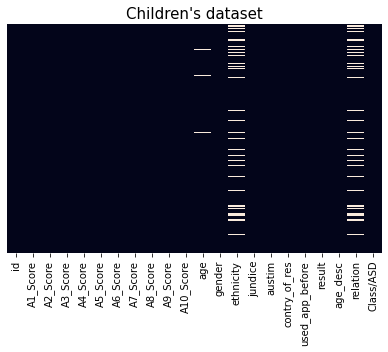

In [ ]:
fig, ax = plt.subplots(figsize=(5.5,5))

sns.heatmap(ch.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax)
ax.set_title("Children's dataset",fontsize = 15)

fig.tight_layout()
plt.savefig('heatmap_ch.pdf', transparent=True, dpi=300)

In [ ]:
#ASD or Not
print("\nNo of children diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'YES']))
print("No of children not diagonised with ASD = ",len(ch[ch['Class/ASD'] == 'NO']))


No of children diagonised with ASD =  141
No of children not diagonised with ASD =  151


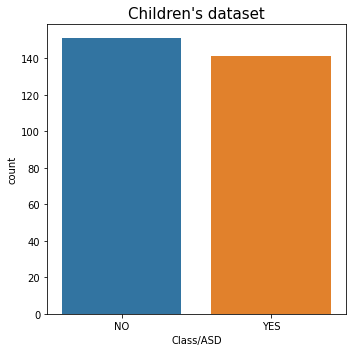

In [ ]:
#Data distribution
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(ch['Class/ASD'],ax=ax)
ax.set_title("Children's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('distribution_ch.pdf', transparent=True, dpi=300)

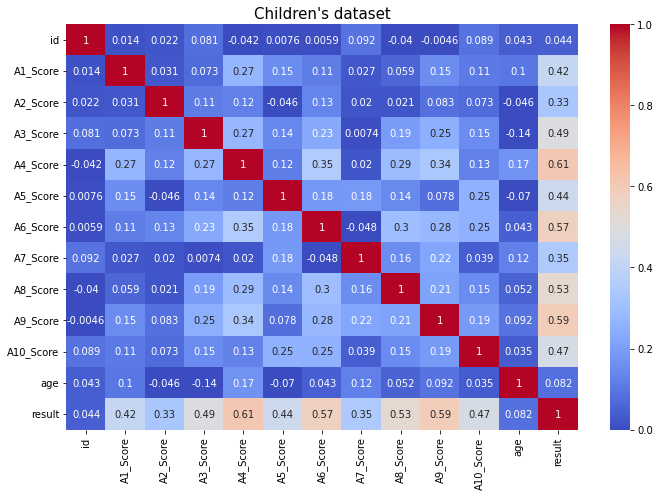

In [ ]:
#Correlation
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(ch.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1,ax=ax)
ax.set_title("Children's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('correlation_ch.pdf', transparent=True, dpi=300)

In [ ]:
#Number of missing values in each dataset
print("No of missing values in Children's dataset    = ",ch.isnull().sum().sum())

No of missing values in Children's dataset    =  90


In [ ]:
#Imputing missing values of categorical features with mode
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

ch.age = imputer_mode.fit_transform(ch.age.values.reshape(-1,1))[:,0]
ch.ethnicity = imputer_mode.fit_transform(ch.ethnicity.values.reshape(-1,1))[:,0]
ch.relation = imputer_mode.fit_transform(ch.relation.values.reshape(-1,1))[:,0]

#Imputing missing values of numerical features with mean
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='mean')

ch.age = imputer_mode.fit_transform(ch.age.values.reshape(-1,1))[:,0]

In [ ]:
print("After imputing,\nNo of missing values in Children's dataset    = ",ch.isnull().sum().sum())

After imputing,
No of missing values in Children's dataset    =  0


In [ ]:
#Since age of toddlers are represented in months, age(in years) of children, adolescents and adults is converted to age in months.
ch.rename(columns = {'age':'Age_Mons'}, inplace = True)

ch['Age_Mons'] = ch['Age_Mons']*12

In [ ]:
#Making classes of categorical variables same for all datasets
ch["relation"] = ch["relation"].replace('self','Self')

### **Model fitting**

*Spliting dependent and independent features*


In [ ]:
shuffled_data = ch.sample(frac=1,random_state=4)
ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'YES']
non_ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'NO'].sample(n=151)
ch= pd.concat([ASD_data, non_ASD_data])

In [ ]:
# Split the data into features and target label
raw_target= ch['Class/ASD']
raw_features = ch[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result','relation']]

*Feature Scaling*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons', 'result']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [ ]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,contry_of_res,result,relation
253,1,0,1,1,1,1,1,1,0,1,0.714286,f,Middle Eastern,no,no,Egypt,0.8,Parent
101,1,1,1,1,0,1,1,0,0,1,0.285714,f,Asian,no,no,Philippines,0.7,Parent
169,1,0,1,1,1,1,1,1,1,1,1.000000,f,White-European,no,no,Austria,0.9,Parent
6,1,0,1,1,1,1,0,1,0,1,0.142857,m,White-European,no,no,United Kingdom,0.7,Parent
233,0,1,1,1,1,1,0,1,1,1,0.142857,m,White-European,no,no,Russia,0.8,Parent


##Encoding Categorical variables

In [ ]:
features = pd.get_dummies(features_minmax_transform)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)

*Function for Evaluation*

In [ ]:
def model_report(y_act, y_pred):
    from sklearn import metrics
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve, auc, log_loss
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall\Sensitivity = " ,recall_score(y_act, y_pred))
    confusion = metrics.confusion_matrix(y_act, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    specificity = TN / (TN + FP)
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_act, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Log Loss = " ,log_loss(y_act, y_pred),"\n")
    pass


In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


##Spliting Data


In [ ]:
X = features
y = target

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
chi2_features = SelectKBest(chi2,k=75)
fit= chi2_features.fit(X, y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(50,'Score')) 

                              Features      Score
3                             A4_Score  42.338541
8                             A9_Score  34.980461
7                             A8_Score  28.251186
11                              result  17.011055
0                             A1_Score  16.570951
9                            A10_Score  15.483910
5                             A6_Score  14.625696
2                             A3_Score  11.734209
79         contry_of_res_United States  10.955781
4                             A5_Score  10.821959
6                             A7_Score   8.630529
1                             A2_Score   7.134778
77  contry_of_res_United Arab Emirates   6.536424
52                contry_of_res_Jordan   4.343619
16                  ethnicity_Hispanic   3.926709
18           ethnicity_Middle Eastern    3.764138
30               contry_of_res_Armenia   3.212766
47                  contry_of_res_Iraq   2.801325
67                 contry_of_res_Qatar   2.801325


In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=75)
X = chi2_features.fit_transform(X, y)
y = target

In [ ]:
#Splitting the data into train test spit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

##KNeighborsClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(x) for x in np.linspace(1,1000,10)]
weights = ['uniform','distance']
algorithm =['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(1,1000,10)]

random_grid = {'n_neighbors':n_neighbors,
               'weights':weights,
               'algorithm':algorithm,
               'leaf_size':leaf_size}
print(random_grid)

{'n_neighbors': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000]}


In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn_randomcv=RandomizedSearchCV(estimator= knn, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
knn_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'n_neighbors': [1, 112, 223, 334, 445,
                                                        556, 667, 778, 889,
                                                        1000],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(knn_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.00102077, 0.0020822 , 0.00087533, 0.00054202, 0.00097108,
       0.00129156, 0.00163288, 0.00415411, 0.00179596, 0.00221887,
       0.00066381, 0.00107112, 0.00093398, 0.00177236, 0.00165205,
       0.00189891, 0.00206275, 0.0013185 , 0.0008184 , 0.00162115,
       0.00245805, 0.0011137 , 0.00073142, 0.0011888 , 0.00146213,
       0.00207863, 0.00203128, 0.00079198, 0.00206594, 0.00094318,
       0.00156002, 0.00166588, 0.00086112, 0.00564566, 0.00193038,
       0.00216074, 0.00218349, 0.00218849, 0.00204058, 0.00085592,
       0.00573764, 0.00108228, 0.00147343, 0.00109172, 0.00146475,
       0.00133023, 0.00130816, 0.00079184, 0.00096135, 0.00076785,
       0.00056419, 0.00073872, 0.0035428 , 0.00439568, 0.00138044,
       0.00139575, 0.00147142, 0.00212607, 0.00112357, 0.00201507,
       0.00156922, 0.0036057 , 0.00144649, 0.00159717, 0.00062885,
       0.00845428, 0.00347657, 0.00137053, 0.00351672, 0.00223236,
       0.00109143, 0.00062995

In [ ]:
print('\n Best estimator:')
print(knn_randomcv.best_estimator_)


 Best estimator:
KNeighborsClassifier(algorithm='brute', leaf_size=445, n_neighbors=1)


In [ ]:
print('\n Best hyperparameters:')
print(knn_randomcv.best_params_)


 Best hyperparameters:
{'weights': 'uniform', 'n_neighbors': 1, 'leaf_size': 445, 'algorithm': 'brute'}


In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(weights='uniform', n_neighbors= 1, leaf_size=445, algorithm='brute')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=445, n_neighbors=1)

In [ ]:
y_pred_knn = knn.predict(X_test)
model_report(y_test, y_pred_knn)

Accuracy =  0.8983050847457628
Precision =  0.8709677419354839
Recall\Sensitivity =  0.9310344827586207
Specificity =  0.8666666666666667
F1 Score =  0.9
AUC Score = 0.8988505747126436
Kappa score =  0.7967853042479909
Log Loss =  3.5124721484607613 



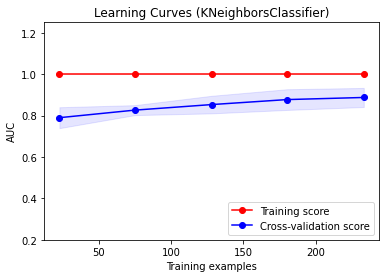

In [ ]:
title = "Learning Curves (KNeighborsClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
knn = neighbors.KNeighborsClassifier(weights='uniform', n_neighbors= 1, leaf_size=445, algorithm='brute')                                 # fill this in
plot_learning_curve(knn, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('KNN_curve.pdf', transparent=True, dpi=300)
plt.savefig('KNN_curve.eps', transparent=True, dpi=300)
plt.show()

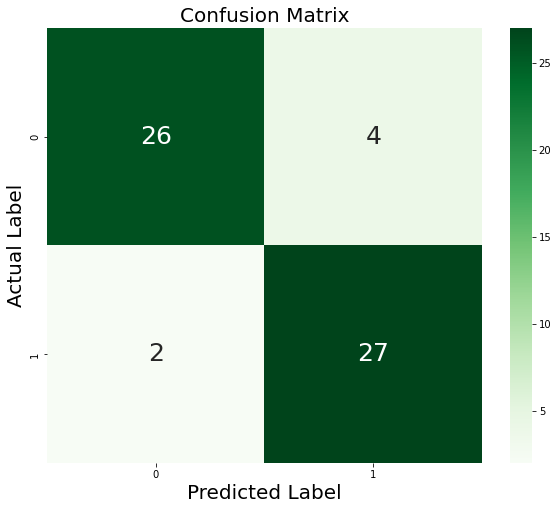

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('KNN_confusion.pdf', transparent=True, dpi=300)
plt.savefig('KNN_confusion.eps', transparent=True, dpi=300)

##SVM Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

C = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]

random_grid = {'C':C,
               'kernel':kernel,
               'degree':degree}
print(random_grid)

{'C': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc_randomcv=RandomizedSearchCV(estimator= svc, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
svc_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              20],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(svc_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.00571337, 0.00317483, 0.0023562 , 0.00212541, 0.0050312 ,
       0.00337381, 0.0065927 , 0.00360212, 0.00346909, 0.00205493,
       0.00226898, 0.0051827 , 0.00301328, 0.0033814 , 0.0026648 ,
       0.00273547, 0.00478573, 0.00311246, 0.00500383, 0.00517988,
       0.0041913 , 0.00217133, 0.00272832, 0.00498009, 0.00487514,
       0.00396261, 0.00388589, 0.00320811, 0.00574398, 0.00431929,
       0.00297942, 0.0028379 , 0.00313797, 0.00327072, 0.00484953,
       0.00349388, 0.00464101, 0.0039237 , 0.00197983, 0.00473971,
       0.01033783, 0.00279064, 0.00354924, 0.00201554, 0.00290647,
       0.00220027, 0.00698333, 0.00509467, 0.00239716, 0.00259395,
       0.0034214 , 0.0036808 , 0.00266428, 0.00222764, 0.00223365,
       0.00276251, 0.00334821, 0.00253057, 0.00516715, 0.00322375,
       0.00493102, 0.00212741, 0.00333028, 0.00380263, 0.00592275,
       0.00204935, 0.00364671, 0.00484867, 0.00269604, 0.00265136,
       0.0031899 , 0.00485821

In [ ]:
print('\n Best estimator:')
print(svc_randomcv.best_estimator_)


 Best estimator:
SVC(C=13, kernel='linear')


In [ ]:
print('\n Best hyperparameters:')
print(svc_randomcv.best_params_)


 Best hyperparameters:
{'kernel': 'linear', 'degree': 3, 'C': 13}


In [ ]:
svc = SVC(kernel='linear',degree=3, C=13)
svc.fit(X_train,y_train)

SVC(C=13, kernel='linear')

In [ ]:
y_pred_svc = svc.predict(X_test)
model_report(y_test, y_pred_svc)

Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  9.992007221626415e-16 



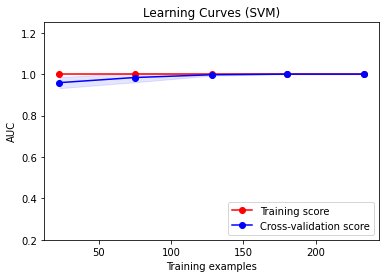

In [ ]:
title = "Learning Curves (SVM)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
svc = SVC(kernel='linear',degree=3, C=13)                               # fill this in
plot_learning_curve(svc, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('SVM_curve.pdf', transparent=True, dpi=300)
plt.savefig('SVM_curve.eps', transparent=True, dpi=300)
plt.show()

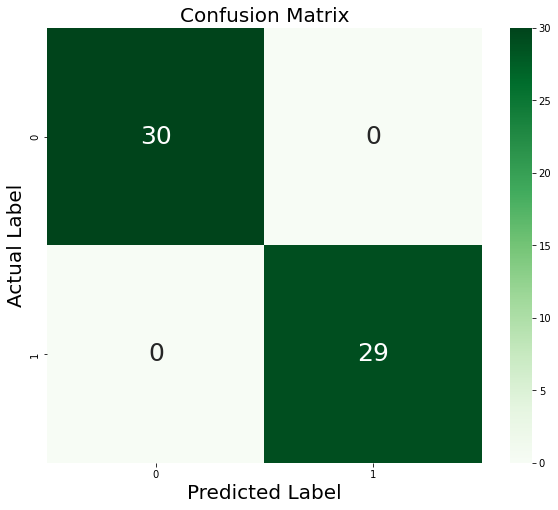

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('SVC_confusion.pdf', transparent=True, dpi=300)
plt.savefig('SVC_confusion.eps', transparent=True, dpi=300)

##Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
#criterion used in trees
criterion = ['entropy','gini']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':criterion}
              
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100, n_jobs=-1)
#fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(rf_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.357516  , 2.54228992, 4.23190169, 3.48452168, 0.37584639,
       1.06027741, 3.50801916, 2.46706405, 2.59040437, 1.05210381,
       1.01821027, 2.46430082, 0.6947135 , 1.02513552, 0.68204627,
       0.45829282, 3.09270453, 1.06806574, 1.46122613, 3.56466408,
       0.36584072, 1.71089549, 2.72808819, 0.34700108, 2.12851806,
       1.45200391, 1.38987894, 0.68733225, 1.57015095, 0.34651117,
       1.41414633, 1.37687273, 0.83177857, 2.06718845, 3.54268107,
       2.7804544 , 2.79029708, 2.92396994, 3.6869184 , 3.1958415 ,
       1.04129376, 3.56464429, 1.37537336, 2.41407943, 3.4732718 ,
       1.37508359, 1.3980484 , 3.1326385 , 3.06792922, 1.02406335,
       2.71747932, 3.40518975, 2.46614819, 1.03786821, 2.40426641,
       0.34493957, 2.51335955, 1.70514636, 1.89748878, 3.42244482,
       3.48274026, 0.69814553, 0.35517135, 3.69226198, 0.69354477,
       1.18457613, 3.12802963, 3.53670278, 1.36051841, 3.43817425,
       2.04515238, 1.0465076 

In [ ]:
print('\n Best estimator:')
print(rf_randomcv.best_estimator_)


 Best estimator:
RandomForestClassifier(criterion='entropy', max_depth=1000, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=200)


In [ ]:
print('\n Best hyperparameters:')
print(rf_randomcv.best_params_)


 Best hyperparameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 1000, 'criterion': 'entropy'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 1000, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=1000, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=200)

In [ ]:
y_pred_rf = rf.predict(X_test)
model_report(y_test, y_pred_rf)

Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  9.992007221626415e-16 



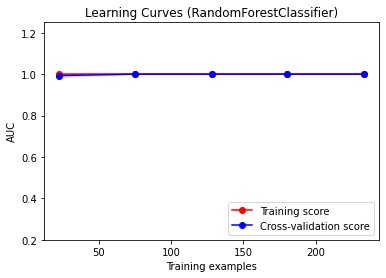

In [ ]:
title = "Learning Curves (RandomForestClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 1000, criterion = 'entropy')                             # fill this in
plot_learning_curve(rf, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('RF_curve.pdf', transparent=True, dpi=300)
plt.savefig('RF_curve.eps', transparent=True, dpi=300)
plt.show()

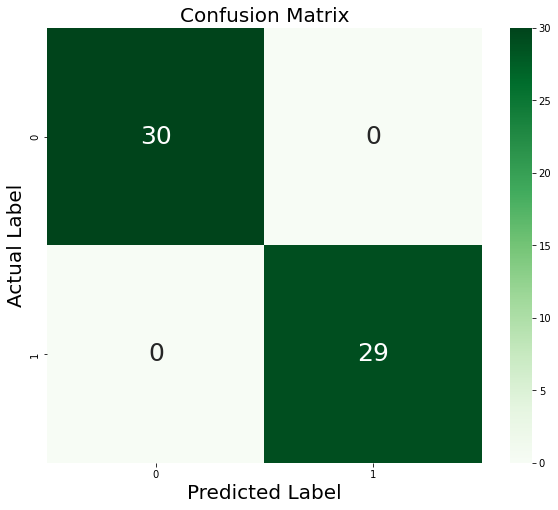

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('RF_confusion.pdf', transparent=True, dpi=300)
plt.savefig('RF_confusion.eps', transparent=True, dpi=300)

##DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_dict ={
             "criterion":['gini','entropy'],
             "max_depth":(150, 155, 160),
             "min_samples_split":range(1,10),
             "min_samples_leaf":range(1,5)
 }

decision_tree = DecisionTreeClassifier(random_state=42)

dt_decision_tree=RandomizedSearchCV(estimator=decision_tree, param_distributions=param_dict, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
dt_decision_tree.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': (150, 155, 160),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 10)},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(dt_decision_tree.cv_results_)


 All results:
{'mean_fit_time': array([0.00166883, 0.00106502, 0.00100851, 0.00102596, 0.00098066,
       0.00099697, 0.00105915, 0.0010335 , 0.00104303, 0.00146132,
       0.00102978, 0.00137863, 0.00103798, 0.00102534, 0.0010128 ,
       0.00134482, 0.00102067, 0.00083756, 0.00103931, 0.00103283,
       0.00100241, 0.00270133, 0.00104532, 0.00107622, 0.0017715 ,
       0.00109143, 0.00116858, 0.00110807, 0.00110102, 0.00119491,
       0.00146132, 0.00086784, 0.00290599, 0.00107222, 0.00113158,
       0.00249357, 0.0019701 , 0.00272679, 0.00171351, 0.00107713,
       0.00151453, 0.00096059, 0.00104485, 0.00105615, 0.00109038,
       0.00111876, 0.00105524, 0.00108275, 0.00202436, 0.00102968,
       0.00101304, 0.00243483, 0.00110502, 0.00159431, 0.0010735 ,
       0.00102706, 0.00103273, 0.00127101, 0.00171676, 0.00165663,
       0.00100846, 0.00102944, 0.00107317, 0.00213757, 0.00109382,
       0.00102305, 0.00329528, 0.00103583, 0.00142913, 0.00214767,
       0.00105987, 0.00102382

In [ ]:
print('\n Best estimator:')
print(dt_decision_tree.best_estimator_)


 Best estimator:
DecisionTreeClassifier(max_depth=160, min_samples_leaf=3, min_samples_split=3,
                       random_state=42)


In [ ]:
print('\n Best hyperparameters:')
print(dt_decision_tree.best_params_)


 Best hyperparameters:
{'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 160, 'criterion': 'gini'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier(min_samples_split = 3, min_samples_leaf = 3, max_depth = 160, criterion = 'gini')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=160, min_samples_leaf=3, min_samples_split=3)

In [ ]:
y_pred_dt = dt.predict(X_test)
model_report(y_test, y_pred_dt)

Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  9.992007221626415e-16 



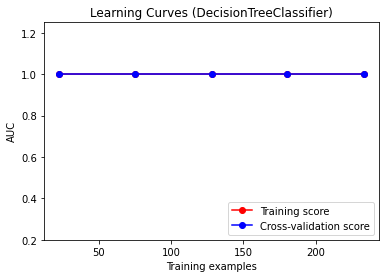

In [ ]:
title = "Learning Curves (DecisionTreeClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(min_samples_split = 3, min_samples_leaf = 3, max_depth = 160, criterion = 'gini')                             # fill this in
plot_learning_curve(dt, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('DT_curve.pdf', transparent=True, dpi=300)
plt.savefig('DT_curve.eps', transparent=True, dpi=300)
plt.show()

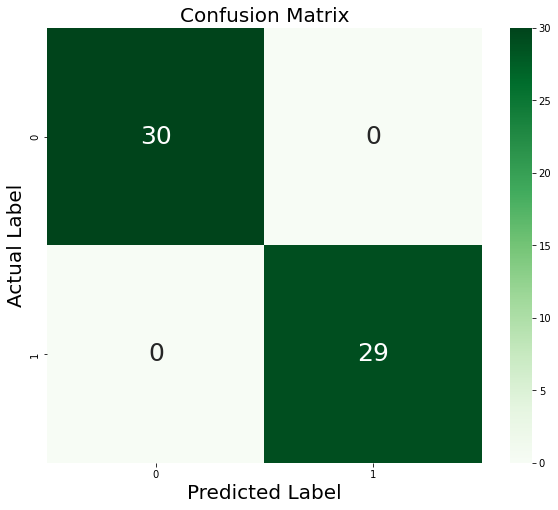

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('DT_confusion.pdf', transparent=True, dpi=300)
plt.savefig('DT_confusion.eps', transparent=True, dpi=300)

##XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

xg_randomcv = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

#fit the randomized model
xg_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': range(2, 10),
                                        'n_estimators': range(60, 220, 40)},
                   scoring='roc_auc', verbose=True)

In [ ]:
print('\n All results:')
print(xg_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([3.18357959, 2.22973948, 0.51015744, 0.96715865, 0.7694716 ,
       0.74846458, 0.33020053, 0.33839836, 0.56808434, 0.4570642 ]), 'std_fit_time': array([0.5614826 , 0.95193362, 0.11758268, 0.06496517, 0.07772883,
       0.10264659, 0.07744715, 0.05017839, 0.06211454, 0.08419853]), 'mean_score_time': array([0.0118772 , 0.00854034, 0.0090735 , 0.00887876, 0.02193518,
       0.01670837, 0.00982862, 0.01128168, 0.00946612, 0.00282841]), 'std_score_time': array([0.00605993, 0.0058922 , 0.00505242, 0.00243606, 0.00618536,
       0.00776186, 0.00621694, 0.00385124, 0.00600667, 0.00074655]), 'param_n_estimators': masked_array(data=[180, 140, 140, 180, 180, 140, 60, 60, 100, 100],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[8, 3, 8, 9, 5, 5, 3, 6, 2, 2],
             mask=[False, False, False, False, False

In [ ]:
print('\n Best estimator:')
print(xg_randomcv.best_estimator_)


 Best estimator:
XGBClassifier(learning_rate=0.05, max_depth=8, n_estimators=180, nthread=4,
              seed=42)


In [ ]:
print('\n Best hyperparameters:')
print(xg_randomcv.best_params_)


 Best hyperparameters:
{'n_estimators': 180, 'max_depth': 8, 'learning_rate': 0.05}


In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_estimators = 180, max_depth = 8, learning_rate = 0.05)
xg.fit(X_train, y_train)

XGBClassifier(learning_rate=0.05, max_depth=8, n_estimators=180)

In [ ]:
y_pred_xg = xg.predict(X_test)
model_report(y_test, y_pred_xg)

Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  9.992007221626415e-16 



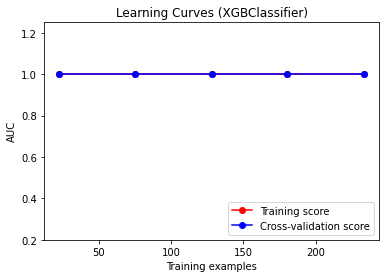

In [ ]:
title = "Learning Curves (XGBClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
xg = XGBClassifier(n_estimators = 140, max_depth = 2, learning_rate = 0.01)                             # fill this in
plot_learning_curve(xg, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('XG_curve.pdf', transparent=True, dpi=300)
plt.savefig('XG_curve.eps', transparent=True, dpi=300)
plt.show()

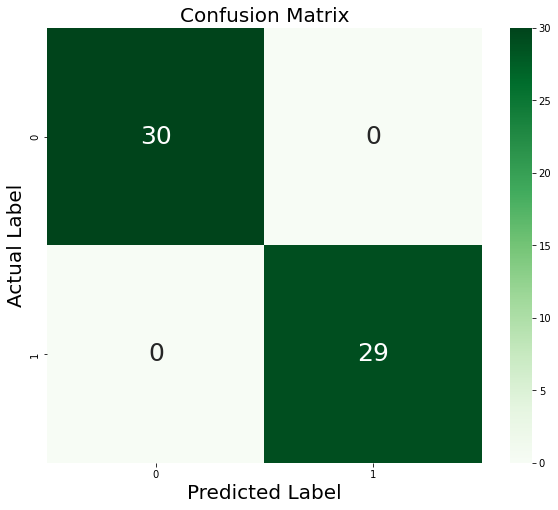

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('XG_confusion.pdf', transparent=True, dpi=300)
plt.savefig('XG_confusion.eps', transparent=True, dpi=300)

##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

grid_values = {'penalty': ['l1','l2'], 
               'C': [0.001,0.01,0.1,1,10,100,1000]}
lr=LogisticRegression(random_state=42)
lr_randomcv = RandomizedSearchCV(lr, param_distributions=grid_values, cv=5)
#fit the randomized model
lr_randomcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']})

In [ ]:
print('\n All results:')
print(lr_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.00027113, 0.00018559, 0.02631159, 0.00019965, 0.00510626,
       0.00018482, 0.00022044, 0.00608182, 0.02181668, 0.00018067]), 'std_fit_time': array([8.37730286e-05, 5.33803385e-05, 1.51085248e-03, 1.59356381e-05,
       1.54827102e-03, 9.52171095e-06, 7.22213284e-05, 1.56414290e-04,
       2.23407081e-03, 1.15276308e-05]), 'mean_score_time': array([0.        , 0.        , 0.00040326, 0.        , 0.00034127,
       0.        , 0.        , 0.00035305, 0.00035782, 0.        ]), 'std_score_time': array([0.00000000e+00, 0.00000000e+00, 3.57979284e-05, 0.00000000e+00,
       1.44699455e-05, 0.00000000e+00, 0.00000000e+00, 6.69680399e-06,
       2.21959374e-05, 0.00000000e+00]), 'param_penalty': masked_array(data=['l1', 'l1', 'l2', 'l1', 'l2', 'l1', 'l1', 'l2', 'l2',
                   'l1'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), '

In [ ]:
print('\n Best estimator:')
print(lr_randomcv.best_estimator_)


 Best estimator:
LogisticRegression(C=1000, random_state=42)


In [ ]:
print('\n Best hyperparameters:')
print(lr_randomcv.best_params_)


 Best hyperparameters:
{'penalty': 'l2', 'C': 1000}


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2', C = 1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1000)

In [ ]:
y_pred_lr = lr.predict(X_test)
model_report(y_test, y_pred_lr)

Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  9.992007221626415e-16 



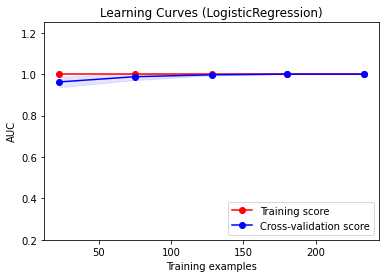

In [ ]:
title = "Learning Curves (LogisticRegression)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
lr = LogisticRegression(penalty = 'l2', C = 1000)                            # fill this in
plot_learning_curve(lr, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('LR_curve.pdf', transparent=True, dpi=300)
plt.savefig('LR_curve.eps', transparent=True, dpi=300)
plt.show()

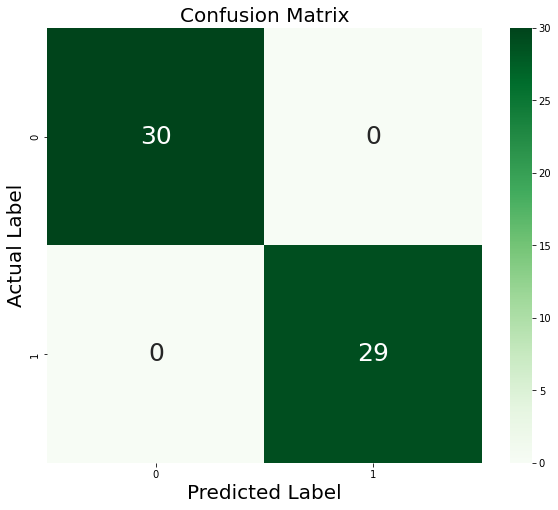

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('LR_confusion.pdf', transparent=True, dpi=300)
plt.savefig('LR_confusion.eps', transparent=True, dpi=300)

In [ ]:
from sklearn.metrics import roc_curve

# Compute fpr, tpr, thresholds and roc auc
fpr_DT, tpr_DT, thresholds = roc_curve(y_test, y_pred_dt)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_pred_lr)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_svc)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, y_pred_xg)

In [ ]:
from sklearn.metrics import auc

roc_auc_DT = auc(fpr_DT, tpr_DT)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_LR = auc(fpr_LR, tpr_LR)
roc_auc_svc = auc(fpr_svc, tpr_svc)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xg = auc(fpr_xg, tpr_xg)

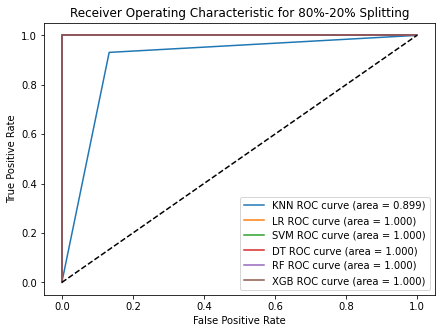

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
plt.figure(figsize = (7, 5))
plt.plot(fpr_knn, tpr_knn, label='KNN ROC curve (area = %0.3f)' % roc_auc_knn)
plt.plot(fpr_LR, tpr_LR, label='LR ROC curve (area = %0.3f)' % roc_auc_LR)
plt.plot(fpr_svc, tpr_svc, label='SVM ROC curve (area = %0.3f)' % roc_auc_svc)
plt.plot(fpr_DT, tpr_DT, label='DT ROC curve (area = %0.3f)' % roc_auc_DT)
plt.plot(fpr_rf, tpr_rf, label='RF ROC curve (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_xg, tpr_xg, label='XGB ROC curve (area = %0.3f)' % roc_auc_xg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for 80%-20% Splitting')
plt.legend(loc="lower right")
plt.savefig('all_roc.pdf', transparent=True, dpi=300)
plt.savefig('all_roc.eps', transparent=True, dpi=300)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=20)
X = chi2_features.fit_transform(features, target)
y = target

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
importance = pd.DataFrame(model.feature_importances_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,importance],axis=1)
featureScores.columns = ['Features','importance']
print(featureScores.nlargest(25,'importance')) 

                      Features  importance
11                      result    0.396377
3                     A4_Score    0.086657
8                     A9_Score    0.071758
0                     A1_Score    0.059193
9                    A10_Score    0.058027
7                     A8_Score    0.050359
2                     A3_Score    0.041572
4                     A5_Score    0.030610
10                    Age_Mons    0.024764
6                     A7_Score    0.022654
1                     A2_Score    0.019349
5                     A6_Score    0.018752
21       ethnicity_South Asian    0.009132
22           ethnicity_Turkish    0.007211
12                    gender_f    0.006861
70  contry_of_res_Saudi Arabia    0.006268
17            ethnicity_Latino    0.006033
41         contry_of_res_Egypt    0.005997
72   contry_of_res_South Korea    0.005225
28   contry_of_res_Afghanistan    0.005218
13                    gender_m    0.004832
73        contry_of_res_Sweden    0.004685
24         

<Figure size 1440x504 with 0 Axes>

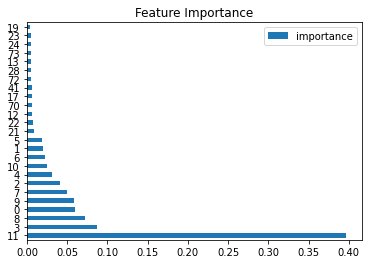

In [ ]:
plt.figure(figsize=(20,7))
featureScores.nlargest(25,'importance').plot(kind='barh')
plt.title('Feature Importance')
plt.savefig('feature_im_adult.pdf', 
           transparent=True, dpi=300)
plt.savefig('feature_im_adult.eps', 
           transparent=True, dpi=300)